In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

# Dataset Loading

In [2]:
df_train = pd.read_csv("/home/nsl48/DeepLearning_Guide/Datathon/dataset/train.csv")
#df_test = pd.read_csv("/home/nsl48/DeepLearning_Guide/Datathon/dataset/test.csv")
df_train = df_train.iloc[:,:-1]
display(df_train)
#display(df_test)

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,...,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,...,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,...,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,...,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,...,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28317,b'gAAAAABinOiX2ss5U2ZT5zFd8zf7HcBDWPvbivNz5wAy...,M,Y,Y,1,D,D,B,0,1,...,0.007216,-8.651173,1.877460,3.637551,11.404942,1.862441,0,0,0.019793,5
28318,b'gAAAAABinOiabmEADrCTZQktCKiahJkR_0kDa_8WOlos...,M,Y,Y,1,D,D,B,0,1,...,0.013369,-8.833046,1.559138,4.247487,5.530054,1.671527,0,0,0.371074,2
28319,b'gAAAAABinOicscC37w1W9uiIlYL1U5D_mUtmgdUg8QTl...,F,Y,Y,1,D,D,B,0,1,...,0.017782,-9.233722,1.455911,2.900249,6.058681,1.627479,0,1,0.826587,1
28320,b'gAAAAABinOib-JZ8iQDxjSRsa1dPT1TqeSQ_si4mAw5f...,M,Y,Y,1,B,C,B,1,1,...,0.007324,-8.748941,2.074394,10.673259,11.387646,1.560391,0,0,0.103523,5


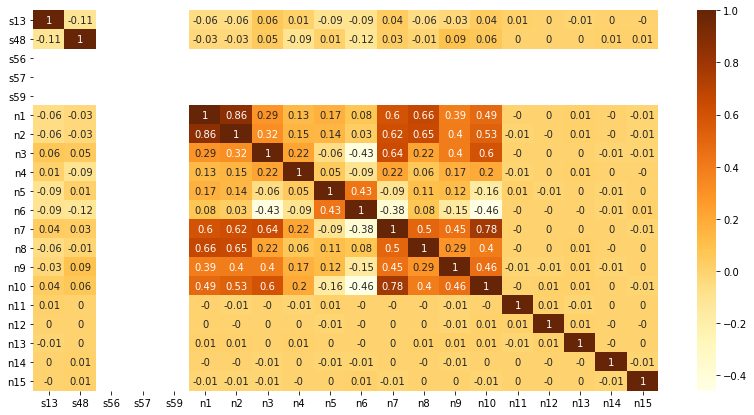

In [3]:
correlation = df_train.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [4]:
#df_train.corr().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

In [5]:
# iterating the columns
column_list =[col for col in df_train.columns]
print(column_list)
print(len(column_list))

['id', 'gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52', 's53', 's54', 's55', 's56', 's57', 's58', 's59', 's69', 's70', 's71', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15']
35


In [6]:
df_train['gender'] = df_train['gender'].replace({'M':1, 'F':0})
df_train['s11'] = df_train['s11'].replace({'Y':1, 'N':0})

df_train['s12'] =  df_train['s12'].replace({'Y':1, 'N':0})
df_train['s16'] =  df_train['s16'].replace({'A':0, 'B':1, 'C':2, 'D':3})
df_train['s17'] =  df_train['s17'].replace({'A':0, 'B':1, 'C':2, 'D':3})
df_train['s18'] =  df_train['s18'].replace({'A':0, 'B':1, 'C':2, 'D':3})

df_train['s70'] =  df_train['s70'].replace({'op: A':0, 'op: B':1, 'op: C':2, 'op: D':3})

df_train['s58'] =  df_train['s58'].replace({'A':0, 'B':1})

df_train['s71'] =  df_train['s71'].replace({'a':0, 'b':1, 'c':2, 'd':3})

df_train['s52'] =  df_train['s52'].replace({'l':1, 'o':0, '1':1, '0':0})

df_train['s69'] =  df_train['s69'].replace({'x':1, '0':1, '~1':0, 'C`':0})

#['x' '~1' 'C`' '0']


display(df_train)

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,1,1,0,1,3,3,1,0,1,...,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,1,1,1,1,3,3,1,1,1,...,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,1,1,1,1,3,3,1,0,1,...,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,0,1,1,1,3,3,1,0,1,...,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,1,0,1,1,1,3,3,1,1,...,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28317,b'gAAAAABinOiX2ss5U2ZT5zFd8zf7HcBDWPvbivNz5wAy...,1,1,1,1,3,3,1,0,1,...,0.007216,-8.651173,1.877460,3.637551,11.404942,1.862441,0,0,0.019793,5
28318,b'gAAAAABinOiabmEADrCTZQktCKiahJkR_0kDa_8WOlos...,1,1,1,1,3,3,1,0,1,...,0.013369,-8.833046,1.559138,4.247487,5.530054,1.671527,0,0,0.371074,2
28319,b'gAAAAABinOicscC37w1W9uiIlYL1U5D_mUtmgdUg8QTl...,0,1,1,1,3,3,1,0,1,...,0.017782,-9.233722,1.455911,2.900249,6.058681,1.627479,0,1,0.826587,1
28320,b'gAAAAABinOib-JZ8iQDxjSRsa1dPT1TqeSQ_si4mAw5f...,1,1,1,1,1,2,1,1,1,...,0.007324,-8.748941,2.074394,10.673259,11.387646,1.560391,0,0,0.103523,5


In [10]:
for col in df_train.columns:
    print(col)
    print(df_train[str(col)].isnull().sum())

id
0
gender
0
s11
0
s12
0
s13
0
s16
0
s17
0
s18
0
s48
0
s52
0
s53
0
s54
25694
s55
25116
s56
28322
s57
28322
s58
0
s59
28322
s69
0
s70
0
s71
0
n1
0
n2
0
n3
0
n4
0
n5
0
n6
0
n7
0
n8
0
n9
0
n10
0
n11
0
n12
0
n13
0
n14
0
n15
0


In [ ]:
for col in df_train.columns:
    print(col)
    df_train[col].isnull().sum()

In [ ]:
correlation = df_train.corr().round(2)
plt.figure(figsize = (19,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [ ]:
col_list = ['gender','n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
            'n9', 'n10','s11', 's12', 's13', 's16', 's17', 
            's18', 's48', 's52', 's69','s71']
print(len(col_list))
#df_train.describe(include='all')

In [ ]:
#df_train.count()

In [ ]:
data_train = df_train[df_train.columns.intersection(col_list)]
display(data_train)

In [ ]:
data_train.describe()

In [ ]:
data_train.info()

In [ ]:
data_train.count()